In [5]:
%load_ext autoreload
%autoreload 2

from src.experiment import get_fallacy_df
from src.analysis import score_fallacy_identification, get_fallacy_identification_accuracies
from src.plot import plot_accuracies
import seaborn as sns
import pandas as pd

sns.set_theme()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fallacy Identification Analysis

## Experiment 1: Fallacy Identification with zero-shot Prompt

In [6]:
df_fallacies_e1 = get_fallacy_df('data/fallacies_e1.csv')

[2024-10-18 19:54:50] Loaded existing fallacy dataframe from data/fallacies_e1.csv.


In [7]:
score_fallacy_identification(df_fallacies_e1)

df_fallacies_e1.head()

,step,entity,fallacy,label,category,type,gpt_4o_response,gpt_4_response,gpt_4o_mini_response,claude_3_5_sonnet_response,...,gemini_1_5_pro_response,gemini_1_5_flash_response,gpt_4_score,gpt_4o_score,gpt_4o_mini_score,claude_3_5_sonnet_score,claude_3_opus_score,claude_3_haiku_score,gemini_1_5_pro_score,gemini_1_5_flash_score
0,Since John asked Maria if she used the last of...,tepas,Argument from Silence,1,informal,insufficiency,No.,No,No.,No,...,No,No,1,1,1,1,1,1,1,1
1,Since Alice asked if Bob knew what an 'ossia' ...,ossia,Argument from Silence,1,informal,insufficiency,No.,No,No.,No,...,No,No,1,1,1,1,1,1,1,1
2,Since Alice claims that the Hausdorff contents...,hausdorff contents,Argument from Silence,1,informal,insufficiency,No.,No,No.,No,...,No,No,1,1,1,1,1,1,1,1
3,"Since Tom, a seasoned tugboater, said that ice...",tugboaters,Argument from Silence,1,informal,insufficiency,No.,No,No.,No,...,Yes,No,1,1,1,1,1,1,0,1
4,Since John accuses Mary of being terrified of ...,beewolf,Argument from Silence,1,informal,insufficiency,No.,No,No.,No,...,No,No,1,1,1,1,1,1,1,1


In [8]:
df_fallacies_e1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   step                        4640 non-null   object
 1   entity                      4640 non-null   object
 2   fallacy                     4640 non-null   object
 3   label                       4640 non-null   int64 
 4   category                    4640 non-null   object
 5   type                        4640 non-null   object
 6   gpt_4o_response             4640 non-null   object
 7   gpt_4_response              4640 non-null   object
 8   gpt_4o_mini_response        4640 non-null   object
 9   claude_3_5_sonnet_response  4640 non-null   object
 10  claude_3_opus_response      4640 non-null   object
 11  claude_3_haiku_response     4640 non-null   object
 12  gemini_1_5_pro_response     4640 non-null   object
 13  gemini_1_5_flash_response   4640 non-null   obje

### Overall Scores

In [9]:
df_accuracies_e1 = get_fallacy_identification_accuracies(df_fallacies_e1)
df_accuracies_e1 = df_accuracies_e1.sort_values('Accuracy', ascending=False)
df_accuracies_e1

,Accuracy
GPT-4,89.8
Gemini 1.5 Pro,88.7
GPT-4o,88.4
GPT-4o Mini,86.9
Claude 3.5 Sonnet,83.6
Gemini 1.5 Flash,83.2
Claude 3 Opus,83.1
Claude 3 Haiku,82.7


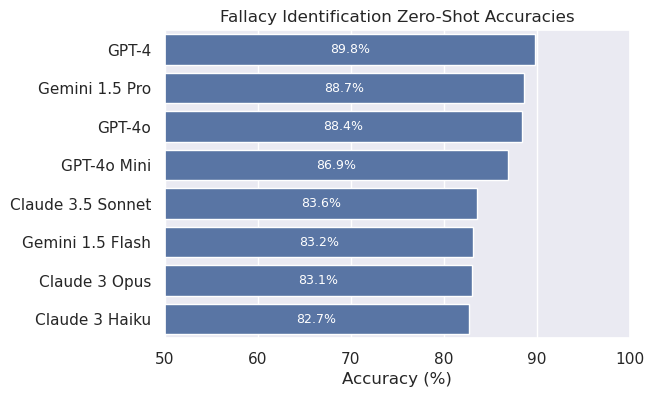

In [10]:
plot_accuracies(
    data=df_accuracies_e1.reset_index(), 
    figsize=(6, 4),
    title='Fallacy Identification Zero-Shot Accuracies',
    annotate=True,
)

### Scores by fallacy category

In [11]:
df_category_accuracies_e1 = get_fallacy_identification_accuracies(df_fallacies_e1, ['category'])
df_category_accuracies_e1

,formal,informal
GPT-4,88.3,89.9
GPT-4o,85.6,88.7
GPT-4o Mini,79.6,87.7
Claude 3.5 Sonnet,85.8,83.4
Claude 3 Opus,84.8,82.9
Claude 3 Haiku,75.8,83.5
Gemini 1.5 Pro,87.7,88.8
Gemini 1.5 Flash,82.5,83.3


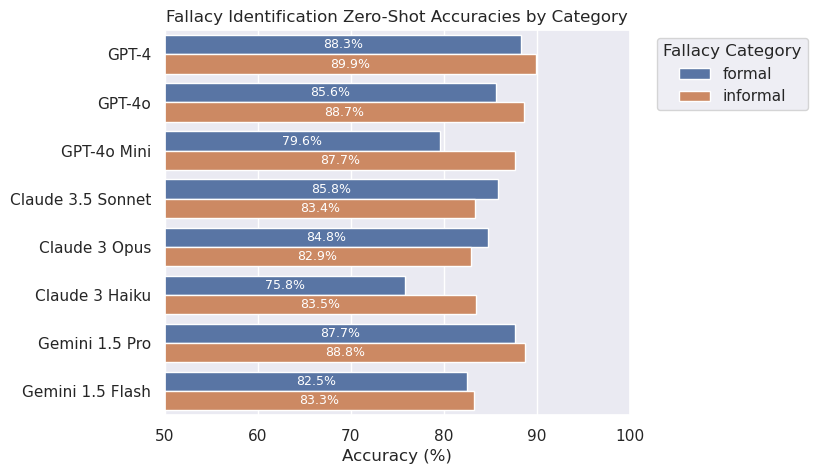

In [12]:
df_category_accuracies_long_e1 = pd.melt(df_category_accuracies_e1, var_name='Category', value_name='Accuracy', ignore_index=False)

plot_accuracies(
    data=df_category_accuracies_long_e1.reset_index(), 
    figsize=(6, 5),
    title='Fallacy Identification Zero-Shot Accuracies by Category',
    hue='Category',
    legend_title='Fallacy Category',
    legend_anchor=(1.4, 1),
    annotate=True,
)

### Scores by fallacy type

In [13]:
df_type_accuracies_e1 = get_fallacy_identification_accuracies(df_fallacies_e1, ['category', 'type'])
df_type_accuracies_e1

formal                                             \
                  probabilistic propositional quantificational syllogistic   
GPT-4                      86.2          93.3             84.2        88.8   
GPT-4o                     87.5          83.3             80.8        90.0   
GPT-4o Mini                77.5          80.0             74.2        84.4   
Claude 3.5 Sonnet          81.2          86.7             80.8        91.2   
Claude 3 Opus              83.8          85.0             86.7        83.8   
Claude 3 Haiku             78.8          69.2             74.2        80.6   
Gemini 1.5 Pro             88.8          85.0             85.8        90.6   
Gemini 1.5 Flash           76.2          81.7             81.7        86.9   

                   informal                                          \
                  ambiguity inappropriate presumption inconsistency   
GPT-4                  84.7                      86.9          85.0   
GPT-4o                 85.0                      87.0          88.3   
GPT-4o Mini            84.3                      87.0          86.7   
Claude 3.5 Sonnet      78.7                      84.3          81.7   
Claude 3 Opus          82.0                      84.0          83.3   
Claude 3 Haiku         81.0                      83.1          78.3   
Gemini 1.5 Pro         85.7                      88.1          80.0   
Gemini 1.5 Flash       80.0                      84.4          81.7   

                                             
                  insufficiency irrelevance  
GPT-4                      94.0        90.2  
GPT-4o                     92.4        87.9  
GPT-4o Mini                91.1        86.3  
Claude 3.5 Sonnet          86.9        81.2  
Claude 3 Opus              86.6        79.6  
Claude 3 Haiku             85.8        82.7  
Gemini 1.5 Pro             92.1        87.8  
Gemini 1.5 Flash           86.6        80.7

In [14]:
df_formal_accuracies_e1 = get_fallacy_identification_accuracies(df_fallacies_e1[df_fallacies_e1['category'] == 'formal'], ['type'])
df_formal_accuracies_e1

,probabilistic,propositional,quantificational,syllogistic
GPT-4,86.2,93.3,84.2,88.8
GPT-4o,87.5,83.3,80.8,90.0
GPT-4o Mini,77.5,80.0,74.2,84.4
Claude 3.5 Sonnet,81.2,86.7,80.8,91.2
Claude 3 Opus,83.8,85.0,86.7,83.8
Claude 3 Haiku,78.8,69.2,74.2,80.6
Gemini 1.5 Pro,88.8,85.0,85.8,90.6
Gemini 1.5 Flash,76.2,81.7,81.7,86.9


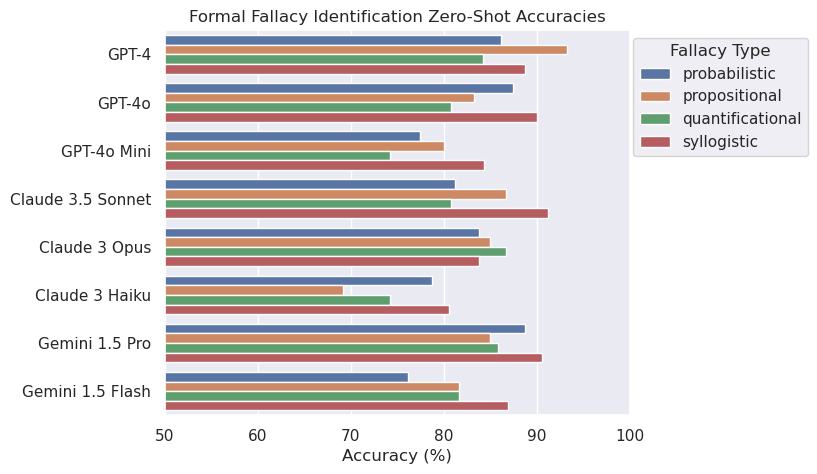

In [15]:
df_formal_accuracies_long_e1 = pd.melt(df_formal_accuracies_e1, var_name='Type', value_name='Accuracy', ignore_index=False)

plot_accuracies(
    data=df_formal_accuracies_long_e1.reset_index(), 
    figsize=(6, 5),
    title='Formal Fallacy Identification Zero-Shot Accuracies',
    hue='Type',
    legend_title='Fallacy Type',
    legend_anchor=(1.4, 1),
    annotate=False,
)

In [16]:
df_informal_accuracies_e1 = get_fallacy_identification_accuracies(df_fallacies_e1[df_fallacies_e1['category'] == 'informal'], ['type'])
df_informal_accuracies_e1

,ambiguity,inappropriate presumption,inconsistency,insufficiency,irrelevance
GPT-4,84.7,86.9,85.0,94.0,90.2
GPT-4o,85.0,87.0,88.3,92.4,87.9
GPT-4o Mini,84.3,87.0,86.7,91.1,86.3
Claude 3.5 Sonnet,78.7,84.3,81.7,86.9,81.2
Claude 3 Opus,82.0,84.0,83.3,86.6,79.6
Claude 3 Haiku,81.0,83.1,78.3,85.8,82.7
Gemini 1.5 Pro,85.7,88.1,80.0,92.1,87.8
Gemini 1.5 Flash,80.0,84.4,81.7,86.6,80.7


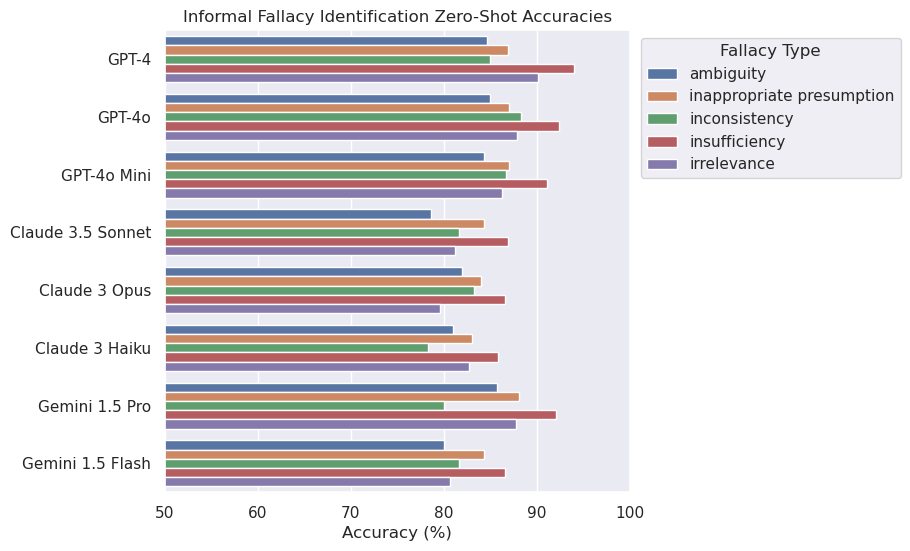

In [17]:
df_informal_accuracies_long_e1 = pd.melt(df_informal_accuracies_e1, var_name='Type', value_name='Accuracy', ignore_index=False)

plot_accuracies(
    data=df_informal_accuracies_long_e1.reset_index(), 
    figsize=(6, 6),
    title='Informal Fallacy Identification Zero-Shot Accuracies',
    hue='Type',
    legend_title='Fallacy Type',
    legend_anchor=(1.6, 1),
    annotate=False,
)

## Experiment 2: Fallacy Identification with few-shot Prompt

In [18]:
df_fallacies_e2 = get_fallacy_df('data/fallacies_e2.csv')

[2024-10-18 19:54:51] Loaded existing fallacy dataframe from data/fallacies_e2.csv.


In [19]:
score_fallacy_identification(df_fallacies_e2)

df_fallacies_e2.head()

,step,entity,fallacy,label,category,type,gpt_4o_response,claude_3_5_sonnet_response,gemini_1_5_pro_response,gpt_4o_score,claude_3_5_sonnet_score,gemini_1_5_pro_score
0,Since John asked Maria if she used the last of...,tepas,Argument from Silence,1,informal,insufficiency,No.,No.,No.,1,1,1
1,Since Alice asked if Bob knew what an 'ossia' ...,ossia,Argument from Silence,1,informal,insufficiency,No.,No.,No.,1,1,1
2,Since Alice claims that the Hausdorff contents...,hausdorff contents,Argument from Silence,1,informal,insufficiency,No.,No.,No.,1,1,1
3,"Since Tom, a seasoned tugboater, said that ice...",tugboaters,Argument from Silence,1,informal,insufficiency,No.,No.,Yes.,1,1,0
4,Since John accuses Mary of being terrified of ...,beewolf,Argument from Silence,1,informal,insufficiency,No.,No.,No.,1,1,1


In [20]:
df_fallacies_e2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   step                        4640 non-null   object
 1   entity                      4640 non-null   object
 2   fallacy                     4640 non-null   object
 3   label                       4640 non-null   int64 
 4   category                    4640 non-null   object
 5   type                        4640 non-null   object
 6   gpt_4o_response             4640 non-null   object
 7   claude_3_5_sonnet_response  4640 non-null   object
 8   gemini_1_5_pro_response     4640 non-null   object
 9   gpt_4o_score                4631 non-null   Int64 
 10  claude_3_5_sonnet_score     4640 non-null   Int64 
 11  gemini_1_5_pro_score        4636 non-null   Int64 
dtypes: Int64(3), int64(1), object(8)
memory usage: 448.7+ KB


### Overall Scores

In [21]:
df_accuracies_e2 = get_fallacy_identification_accuracies(df_fallacies_e2)
df_accuracies_e2 = df_accuracies_e2.sort_values('Accuracy', ascending=False)
df_accuracies_e2

,Accuracy
Gemini 1.5 Pro,87.5
GPT-4o,87.0
Claude 3.5 Sonnet,84.5


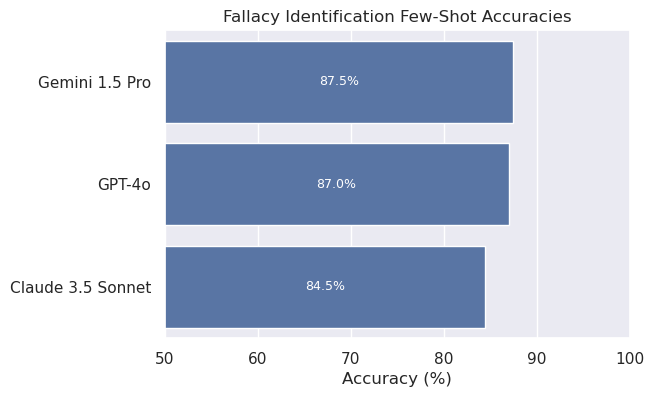

In [22]:
plot_accuracies(
    data=df_accuracies_e2.reset_index(), 
    figsize=(6, 4),
    title='Fallacy Identification Few-Shot Accuracies',
    annotate=True,
)

### Scores by fallacy category

In [23]:
df_category_accuracies_e2 = get_fallacy_identification_accuracies(df_fallacies_e2, ['category'])
df_category_accuracies_e2

,formal,informal
GPT-4o,85.0,87.2
Claude 3.5 Sonnet,86.2,84.3
Gemini 1.5 Pro,85.0,87.8


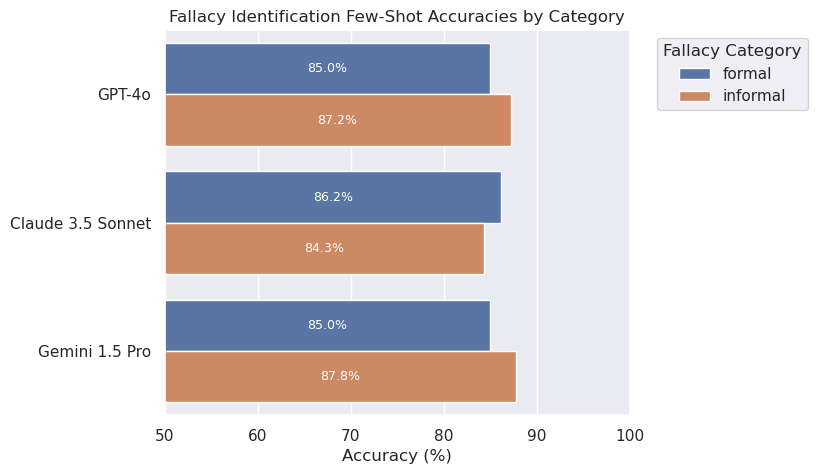

In [24]:
df_category_accuracies_long_e2 = pd.melt(df_category_accuracies_e2, var_name='Category', value_name='Accuracy', ignore_index=False)

plot_accuracies(
    data=df_category_accuracies_long_e2.reset_index(), 
    figsize=(6, 5),
    title='Fallacy Identification Few-Shot Accuracies by Category',
    hue='Category',
    legend_title='Fallacy Category',
    legend_anchor=(1.4, 1),
    annotate=True,
)

### Scores by fallacy type

In [25]:
df_type_accuracies = get_fallacy_identification_accuracies(df_fallacies_e2, ['category', 'type'])
df_type_accuracies

formal                                             \
                  probabilistic propositional quantificational syllogistic   
GPT-4o                     87.5          85.0             76.7        90.0   
Claude 3.5 Sonnet          85.0          82.5             85.0        90.6   
Gemini 1.5 Pro             86.2          83.3             83.3        86.9   

                   informal                                          \
                  ambiguity inappropriate presumption inconsistency   
GPT-4o                 84.7                      87.0          83.3   
Claude 3.5 Sonnet      83.0                      84.3          88.3   
Gemini 1.5 Pro         85.0                      85.5          83.3   

                                             
                  insufficiency irrelevance  
GPT-4o                     90.3        85.6  
Claude 3.5 Sonnet          87.0        82.5  
Gemini 1.5 Pro             90.0        88.5

In [26]:
df_formal_accuracies_e2 = get_fallacy_identification_accuracies(df_fallacies_e2[df_fallacies_e2['category'] == 'formal'], ['type'])
df_formal_accuracies_e2

,probabilistic,propositional,quantificational,syllogistic
GPT-4o,87.5,85.0,76.7,90.0
Claude 3.5 Sonnet,85.0,82.5,85.0,90.6
Gemini 1.5 Pro,86.2,83.3,83.3,86.9


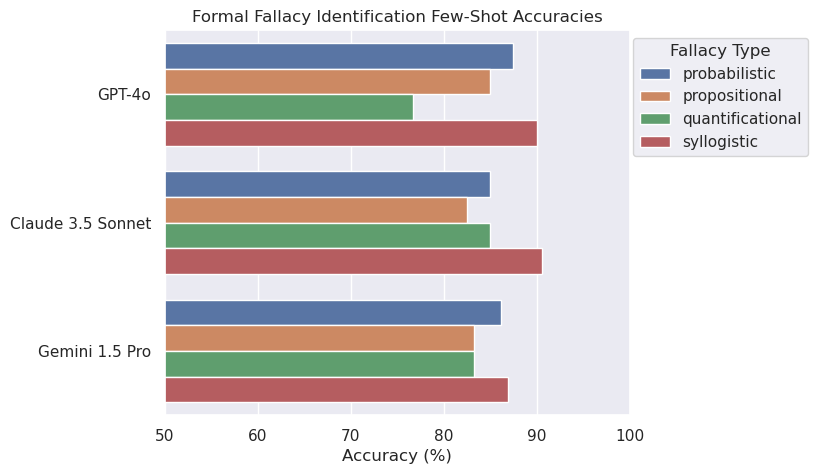

In [27]:
df_formal_accuracies_long_e2 = pd.melt(df_formal_accuracies_e2, var_name='Type', value_name='Accuracy', ignore_index=False)

plot_accuracies(
    data=df_formal_accuracies_long_e2.reset_index(), 
    figsize=(6, 5),
    title='Formal Fallacy Identification Few-Shot Accuracies',
    hue='Type',
    legend_title='Fallacy Type',
    legend_anchor=(1.4, 1),
    annotate=False,
)

In [28]:
df_informal_accuracies_e2 = get_fallacy_identification_accuracies(df_fallacies_e2[df_fallacies_e2['category'] == 'informal'], ['type'])
df_informal_accuracies_e2

,ambiguity,inappropriate presumption,inconsistency,insufficiency,irrelevance
GPT-4o,84.7,87.0,83.3,90.3,85.6
Claude 3.5 Sonnet,83.0,84.3,88.3,87.0,82.5
Gemini 1.5 Pro,85.0,85.5,83.3,90.0,88.5


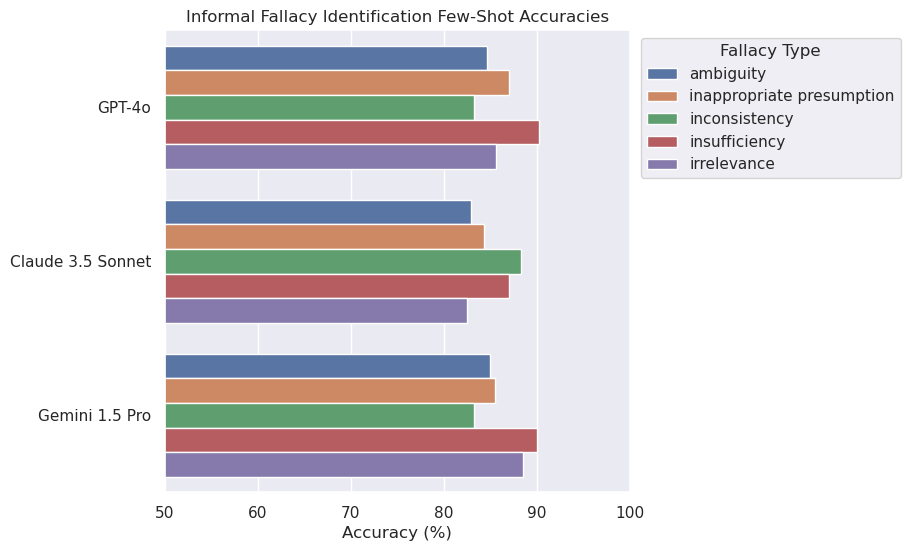

In [29]:
df_informal_accuracies_long_e2 = pd.melt(df_informal_accuracies_e2, var_name='Type', value_name='Accuracy', ignore_index=False)

plot_accuracies(
    data=df_informal_accuracies_long_e2.reset_index(), 
    figsize=(6, 6),
    title='Informal Fallacy Identification Few-Shot Accuracies',
    hue='Type',
    legend_title='Fallacy Type',
    legend_anchor=(1.6, 1),
    annotate=False,
)